# Scraping `zangia.mn`
* You need to import `pandas`, `requests` and `BeautifulSoup`

In [81]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

### Exercise 1: Scrape `zangia.mn` page#1
* Make a dataframe using `Мэдээлэл технологи, Харилцаа холбоо` category `https://www.zangia.mn/job/list/pg.1/b.4`.
* Get job listings from page 1.
  * DataFrame should include columns: `job_title`, `salary`. 
  * Remove the row if `salary` text contains `Тохиролцоно`. 
    * *Hint*: Loop over the df and use `in` and `drop` methods.
  * Take salary as 5000000 if `salary` text contains `5,000,000 -ааc дээш`
  * Import statistics library
  * Get the median salary using statistics library if there is a salary range. Example: 2,500,000-3,500,000 should be 3000000. 
    * Use string replace method to remove comma from numbers.
    * *Hint*: Use string split method to get the numbers. 
  * Make a histogram plot using the `salary`.  


In [82]:
response = requests.get("https://www.zangia.mn/job/list/pg.1/b.4")
soup = BeautifulSoup(response.content)

In [83]:
ads = soup.find_all("div", {"class": "ad"})

In [84]:
ads[0].find('b').get_text()

'Мэдээлэл технологийн мэргэжилтэн'

In [85]:
job_titles = []
for ad in ads:
    job_title = ad.find('b').get_text()
    # print(job_title)
    job_titles.append(job_title)

In [86]:
ads[0].find('span', {"class": "fsal"}).get_text() 

'1,800,000 - 2,100,000'

In [87]:
job_salaries = []
for ad in ads:
    job_salary = ad.find('span', {"class": "fsal"}).get_text()
    job_salaries.append(job_salary)

In [88]:
df = pd.DataFrame({"job_titles": job_titles, "job_salary": job_salaries})

In [89]:
df.head()

,job_titles,job_salary
0,Мэдээлэл технологийн мэргэжилтэн,"1,800,000 - 2,100,000"
1,Тестер,"2,100,000 - 2,500,000"
2,ДАТА АНАЛИСТ,"2,100,000 - 2,500,000"
3,Call center operator,"1,000,000 - 1,200,000"
4,Оператор (эмэгтэй),"1,000,000 - 1,200,000"


In [96]:
df = df.reset_index(drop=True)

In [97]:
for i in range(len(df)):
    if "Тохиролцоно" in df['job_salary'][i]:
        df.drop(i, inplace=True)
        # df = df.drop(i)
    elif "5,000,000 -ааc дээш" in df['job_salary'][i]:
        df['job_salary'][i] = 5_000_000
    # print(df['job_salary'][i])

In [98]:
df = df.reset_index(drop=True)

In [99]:
int(df['job_salary'][0].split('-')[0].replace(',', ''))

1800000

In [100]:
for i in range(len(df)):
    lower_sal = int(df['job_salary'][i].split('-')[0].replace(',', ''))
    upper_sal = int(df['job_salary'][i].split('-')[1].replace(',', ''))

    median_sal = statistics.median([lower_sal, upper_sal])
    # print(median_sal)
    df['job_salary'][i] = median_sal

In [101]:
df

,job_titles,job_salary
0,Мэдээлэл технологийн мэргэжилтэн,1950000.0
1,Тестер,2300000.0
2,ДАТА АНАЛИСТ,2300000.0
3,Call center operator,1100000.0
4,Оператор (эмэгтэй),1100000.0
5,Huawei брэндын засварын ажилтан,1650000.0
6,Банк бусын оператор,1350000.0
7,Нэвтрүүлэлтийн мэргэжилтэн,1350000.0
8,BackEnd хөгжүүлэгч,2300000.0
9,ХАРИЛЦАГЧИЙН ЗӨВЛӨХ /УТАСНЫ ОПЕРАТОР/,1350000.0


<AxesSubplot:ylabel='Frequency'>

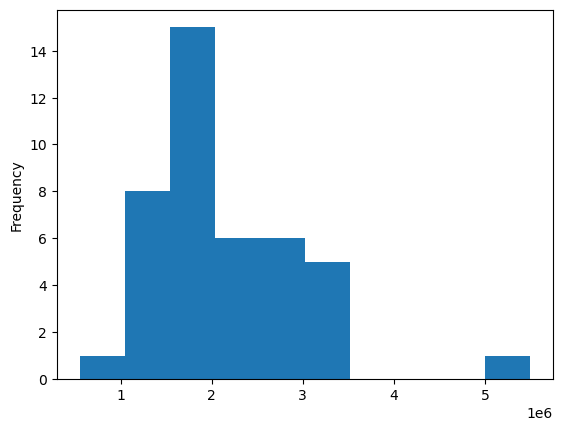

In [119]:
df['job_salary'].plot.hist()

### Exercise 2: Scrape `zangia.mn` Page#1 - Page#10
* Make a dataframe using `Мэдээлэл технологи, Харилцаа холбоо` category `https://www.zangia.mn/job/list/pg.1/b.4`.
* Get job listings from page 1-10. *Hint* Loop over the list of pages
* Make a dataframe and make a histogram plot using `salary` column.

In [ ]:
# Your code

In [150]:
for page in range(1, 11):
    
    response = requests.get("https://www.zangia.mn/job/list/pg.1/b.4")
    soup = BeautifulSoup(response.content)

In [151]:
ads = soup.find_all("div", {"class": "ad"})

In [152]:
ads[0].find('b').get_text()

'Хөгжүүлэгч (Back End)'

In [153]:
job_titles = []
for ad in ads:
    job_title = ad.find('b').get_text()
    # print(job_title)
    job_titles.append(job_title)

In [154]:
ads[0].find('span', {"class": "fsal"}).get_text() 

'3,000,000 - 4,000,000 Тохиролцоно'

In [155]:
job_salaries = []
for ad in ads:
    job_salary = ad.find('span', {"class": "fsal"}).get_text()
    job_salaries.append(job_salary)

In [156]:
df = pd.DataFrame({"job_titles": job_titles, "job_salary": job_salaries})

In [157]:
df.head()

,job_titles,job_salary
0,Хөгжүүлэгч (Back End),"3,000,000 - 4,000,000 Тохиролцоно"
1,Мэдээлэл технологийн мэргэжилтэн,"1,800,000 - 2,100,000"
2,Програм хангамжийн чанарын мэргэжилтэн,"1,800,000 - 2,100,000"
3,Ахлах хөгжүүлэгч (FE),"4,000,000 - 5,000,000 Тохиролцоно"
4,Тестэр /Коор майнд ХХК/,"1,500,000 - 1,800,000"


In [158]:
df = df.reset_index(drop=True)

In [159]:
for i in range(len(df)):
    if "Тохиролцоно" in df['job_salary'][i]:
        df.drop(i, inplace=True)
        # df = df.drop(i)
    elif "5,000,000 -ааc дээш" in df['job_salary'][i]:
        df['job_salary'][i] = 5_000_000
    # print(df['job_salary'][i])

In [160]:
df = df.reset_index(drop=True)

In [161]:
int(df['job_salary'][0].split('-')[0].replace(',', ''))

1800000

In [162]:
for i in range(len(df)):
    lower_sal = int(df['job_salary'][i].split('-')[0].replace(',', ''))
    upper_sal = int(df['job_salary'][i].split('-')[1].replace(',', ''))

    median_sal = statistics.median([lower_sal, upper_sal])
    # print(median_sal)
    df['job_salary'][i] = median_sal

In [166]:
len(df)

45

In [167]:
df

,job_titles,job_salary
0,Мэдээлэл технологийн мэргэжилтэн,1950000.0
1,Програм хангамжийн чанарын мэргэжилтэн,1950000.0
2,Тестэр /Коор майнд ХХК/,1650000.0
3,Мэдээлэл технологийн ажилтан /support/,1350000.0
4,Өгөгдлийн сангийн администратор,2300000.0
5,Програм хангамжийн архитектур,3500000.0
6,Мэдээлэл технологийн инженер,2300000.0
7,Оператор,1350000.0
8,ТООЦООНЫ НЯГТЛАН БОДОГЧ,1650000.0
9,Тестер,2300000.0


In [170]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Initialize empty lists to store job titles and salaries
job_titles = []
job_salaries = []

# Loop over pages 1 to 10
for page in range(1, 11):
    url = f"https://www.zangia.mn/job/list/pg.{page}/b.4"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Find all job listings on the page
    ads = soup.find_all("div", {"class": "ad"})

    for ad in ads:
        job_title = ad.find('b').get_text()
        job_salary = ad.find('span', {"class": "fsal"}).get_text()

        job_titles.append(job_title)
        job_salaries.append(job_salary)

# Create a DataFrame from the collected data
df = pd.DataFrame({"job_titles": job_titles, "job_salary": job_salaries})

# Optionally, perform data cleaning and analysis on the DataFrame here

# Display the DataFrame


In [171]:
df.head()

,job_titles,job_salary
0,Хөгжүүлэгч (Back End),"3,000,000 - 4,000,000 Тохиролцоно"
1,Мэдээлэл технологийн мэргэжилтэн,"1,800,000 - 2,100,000"
2,Мэдээлэл технологийн төслийн менежер,"3,000,000 - 4,000,000"
3,Төслийн мэргэжилтэн (SAP),"1,800,000 - 2,100,000"
4,Програм хангамжийн чанарын мэргэжилтэн,"1,800,000 - 2,100,000"


In [172]:
len(df)

502

In [173]:
df

,job_titles,job_salary
0,Хөгжүүлэгч (Back End),"3,000,000 - 4,000,000 Тохиролцоно"
1,Мэдээлэл технологийн мэргэжилтэн,"1,800,000 - 2,100,000"
2,Мэдээлэл технологийн төслийн менежер,"3,000,000 - 4,000,000"
3,Төслийн мэргэжилтэн (SAP),"1,800,000 - 2,100,000"
4,Програм хангамжийн чанарын мэргэжилтэн,"1,800,000 - 2,100,000"
...,...,...
497,Бизнесийн шинжээч,"2,100,000 - 2,500,000"
498,ШУУДАНЧ,"1,200,000 - 1,500,000"
499,Программист,"2,100,000 - 2,500,000"
500,Senior Full-Stack Engineer,"3,000,000 - 4,000,000 Тохиролцоно"


In [174]:
df = df.reset_index(drop=True)

In [175]:
for i in range(len(df)):
    if "Тохиролцоно" in df['job_salary'][i]:
        df.drop(i, inplace=True)
        # df = df.drop(i)
    elif "5,000,000 -ааc дээш" in df['job_salary'][i]:
        df['job_salary'][i] = 5_000_000
    # print(df['job_salary'][i])

In [176]:
df = df.reset_index(drop=True)

In [177]:
int(df['job_salary'][0].split('-')[0].replace(',', ''))

1800000

In [178]:
for i in range(len(df)):
    lower_sal = int(df['job_salary'][i].split('-')[0].replace(',', ''))
    upper_sal = int(df['job_salary'][i].split('-')[1].replace(',', ''))

    median_sal = statistics.median([lower_sal, upper_sal])
    # print(median_sal)
    df['job_salary'][i] = median_sal

In [181]:
df

,job_titles,job_salary
0,Мэдээлэл технологийн мэргэжилтэн,1950000.0
1,Мэдээлэл технологийн төслийн менежер,3500000.0
2,Төслийн мэргэжилтэн (SAP),1950000.0
3,Програм хангамжийн чанарын мэргэжилтэн,1950000.0
4,Тестэр /Коор майнд ХХК/,1650000.0
...,...,...
362,Дуудлагын төвийн оператор,900000.0
363,Бизнесийн шинжээч,2300000.0
364,ШУУДАНЧ,1350000.0
365,Программист,2300000.0


### Exercise 3: Scrape `zangia.mn` Page#1 - Page#7
* Make a dataframe using `Захиргаа, Хүний нөөц` category `https://www.zangia.mn/job/list/pg.1/b.36`.
* Get job listings from page 1-7.
* Make a dataframe and make a histogram plot using `salary` column.

**WARNING** MAKE SURE YOUR LINKS ARE CORRECT!

In [ ]:
# Your code

In [186]:
for page in range(1, 8):
    url = f"https://www.zangia.mn/job/list/pg.1/b.36"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

In [187]:
ads = soup.find_all("div", {"class": "ad"})

In [188]:
ads[0].find('b').get_text()

'Ресепшн/Мэдээллийн ажилтан яаралтай ажилд авна.'

In [189]:
job_titles = []
for ad in ads:
    job_title = ad.find('b').get_text()
    # print(job_title)
    job_titles.append(job_title)

In [190]:
ads[0].find('span', {"class": "fsal"}).get_text() 

'1,800,000 - 2,100,000'

In [192]:
job_salaries = []
for ad in ads:
    job_salary = ad.find('span', {"class": "fsal"}).get_text()
    job_salaries.append(job_salary)

In [193]:
df = pd.DataFrame({"job_titles": job_titles, "job_salary": job_salaries})

In [194]:
df

,job_titles,job_salary
0,Ресепшн/Мэдээллийн ажилтан яаралтай ажилд авна.,"1,800,000 - 2,100,000"
1,ЗАХИРЛЫН ТУСЛАХ,"1,500,000 - 1,800,000"
2,Нярав,"1,500,000 - 1,800,000"
3,ХҮНИЙ НӨӨЦИЙН АЖИЛТАН (Оюу Толгой дахь төсөл),"1,800,000 - 2,100,000"
4,Оффис Менежер,"1,500,000 - 1,800,000 Тохиролцоно"
5,Сургалтын менежер,"1,500,000 - 1,800,000 Тохиролцоно"
6,"Бичиг хэргийн ажилтан ""Гэрэлт тамга""ХХК","1,200,000 - 1,500,000"
7,Хүний нөөцийн менежер,"2,500,000 - 3,000,000 Тохиролцоно"
8,"Сургалт, хүний нөөцийн менежер","2,100,000 - 2,500,000"
9,Хүний нөөцийн мэргэжилтэн,"2,100,000 - 2,500,000 Тохиролцоно"


In [195]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Initialize empty lists to store job titles and salaries
job_titles = []
job_salaries = []

# Loop over pages 1 to 10
for page in range(1, 8):
    url = f"https://www.zangia.mn/job/list/pg.1/b.36"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Find all job listings on the page
    ads = soup.find_all("div", {"class": "ad"})

    for ad in ads:
        job_title = ad.find('b').get_text()
        job_salary = ad.find('span', {"class": "fsal"}).get_text()

        job_titles.append(job_title)
        job_salaries.append(job_salary)

# Create a DataFrame from the collected data
df = pd.DataFrame({"job_titles": job_titles, "job_salary": job_salaries})

# Optionally, perform data cleaning and analysis on the DataFrame here

# Display the DataFrame

In [196]:
df

,job_titles,job_salary
0,Ресепшн/Мэдээллийн ажилтан яаралтай ажилд авна.,"1,800,000 - 2,100,000"
1,ЗАХИРЛЫН ТУСЛАХ,"1,500,000 - 1,800,000"
2,Нярав,"1,500,000 - 1,800,000"
3,ХҮНИЙ НӨӨЦИЙН АЖИЛТАН (Оюу Толгой дахь төсөл),"1,800,000 - 2,100,000"
4,Оффис Менежер,"1,500,000 - 1,800,000 Тохиролцоно"
...,...,...
401,ХҮНИЙ НӨӨЦИЙН МЭРГЭЖИЛТЭН,"2,100,000 - 2,500,000"
402,Хүний нөөцийн менежер /Blue Sky Tower/,"2,100,000 - 2,500,000"
403,Үл хөдлөх хөрөнгийн зууч /REAL ESTATE AGENT/,"4,000,000 - 5,000,000"
404,Сургалт хөгжил хариуцсан мэргэжилтэн,"1,800,000 - 2,100,000"


In [197]:
len(df)

406